In [26]:
# Análise de Correspondência Simples e Múltipla
# MBA em Data Science e Analytics USP ESALQ

# Prof. Dr. Wilson Tarantin Junior

#%% Instalando os pacotes

## Executar na linha de comando do console (sem o #)

# pip install pandas
# pip install numpy
# pip install scipy
# pip install plotly
# pip install seaborn
# pip install matplotlib
# pip install statsmodels
# pip install prince

In [27]:
#%% Importando os pacotes necessários

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import prince
import plotly.graph_objects as go

In [28]:
#%% Análise de Correspondência Simples (ANACOR)

# Importando o banco de dados

perfil = pd.read_excel("perfil_aplicacao.xlsx")
perfil

,Estudante,Perfil,Tipo de Aplicação
0,Gabriela,Conservador,Poupança
1,Luiz Felipe,Conservador,Poupança
2,Patrícia,Conservador,Poupança
3,Gustavo,Conservador,Poupança
4,Letícia,Conservador,Poupança
...,...,...,...
95,Sheila,Agressivo,Ações
96,Pedro,Agressivo,Ações
97,Horácio,Agressivo,Ações
98,Leandro,Agressivo,Ações


In [29]:
#%% Informações descritivas sobre as variáveis

print(perfil['Perfil'].value_counts())
print(perfil['Tipo de Aplicação'].value_counts())

Perfil
Agressivo      58
Moderado       25
Conservador    17
Name: count, dtype: int64
Tipo de Aplicação
Ações       45
CDB         40
Poupança    15
Name: count, dtype: int64


In [30]:
#%% Criando a tabela de contingência

tabela = pd.crosstab(perfil["Perfil"], perfil["Tipo de Aplicação"])

print(tabela)

# Nota: sempre manter o nome deste objeto como "tabela" para uso posterior!

Tipo de Aplicação  Ações  CDB  Poupança
Perfil                                 
Agressivo             36   20         2
Conservador            5    4         8
Moderado               4   16         5


In [31]:
#%% Analisando a significância estatística da associação (teste qui²)

teste_qui2 = chi2_contingency(tabela)

print(f"estatística qui²: {round(teste_qui2[0], 2)}")
print(f"p-valor da estatística: {round(teste_qui2[1], 4)}")
print(f"graus de liberdade: {teste_qui2[2]}")

estatística qui²: 31.76
p-valor da estatística: 0.0
graus de liberdade: 4


# 📌 O que cada número significa

### 1️⃣ Estatística Qui-quadrado (χ² = 31.76)

Representa o quanto a distribuição observada se afasta da distribuição esperada caso as variáveis fossem independentes.

#### 👉 Quanto maior esse valor:
	•	maior é a evidência de que as variáveis NÃO são independentes
	•	ou seja, existe associação entre elas


### 2️⃣ p-valor (p ≈ 0.0000)

O p-valor mede a probabilidade de observar um resultado tão extremo quanto esse se as variáveis fossem independentes.

#### 📌 Regra prática:
	•	p ≤ 0,05 → rejeita H₀ (há associação)
	•	p > 0,05 → não rejeita H₀ (sem evidência de associação)

### 👉 No seu caso:
p ≈ 0.0000 → fortíssima evidência de associação estatística
✔️ Portanto: as variáveis estão associadas estatisticamente

In [33]:
#%% Análise dos resíduos provenientes da tabela de contingência

# Parametrizando a função

tab_cont = sm.stats.Table(tabela)

# Tabela de frequências absolutas esperadas
print('')
print(tab_cont.fittedvalues)

# Tabela de resíduos: diferença entre freq. absolutas observadas e esperadas
print('')
print(tabela - tab_cont.fittedvalues)

# Valores qui-quadrado por célula
print('')
print(tab_cont.chi2_contribs)

# Resíduos padronizados
print('')
print(tab_cont.resid_pearson)

# Resíduos padronizados ajustados
print('')
print(tab_cont.standardized_resids)



Tipo de Aplicação  Ações   CDB  Poupança
Perfil                                  
Agressivo          26.10  23.2      8.70
Conservador         7.65   6.8      2.55
Moderado           11.25  10.0      3.75

Tipo de Aplicação  Ações  CDB  Poupança
Perfil                                 
Agressivo           9.90 -3.2     -6.70
Conservador        -2.65 -2.8      5.45
Moderado           -7.25  6.0      1.25

Tipo de Aplicação     Ações       CDB   Poupança
Perfil                                          
Agressivo          3.755172  0.441379   5.159770
Conservador        0.917974  1.152941  11.648039
Moderado           4.672222  3.600000   0.416667

Tipo de Aplicação     Ações       CDB  Poupança
Perfil                                         
Agressivo          1.937827 -0.664364 -2.271513
Conservador       -0.958110 -1.073751  3.412922
Moderado          -2.161532  1.897367  0.645497

Tipo de Aplicação     Ações       CDB  Poupança
Perfil                                         
Agressivo

In [34]:
#%% Mapa de calor dos resíduos padronizados ajustados

fig = go.Figure()

maxz = np.max(tab_cont.standardized_resids)+0.1
minz = np.min(tab_cont.standardized_resids)-0.1

colorscale = ['skyblue' if i>1.96 else '#FAF9F6' for i in np.arange(minz,maxz,0.01)]

fig.add_trace(
    go.Heatmap(
        x = tab_cont.standardized_resids.columns,
        y = tab_cont.standardized_resids.index,
        z = np.array(tab_cont.standardized_resids),
        text = tab_cont.standardized_resids.values,
        texttemplate = '%{text:.2f}',
        showscale = False,
        colorscale = colorscale))

fig.update_layout(
    title_text = 'Resíduos Padronizados Ajustados',
    title_x = 0.5,
    height = 600,
    width = 600)

fig.update_xaxes(categoryorder = 'category ascending')
fig.update_yaxes(categoryorder = 'category descending')

fig.write_html('assoc_perfil_aplic.html')

In [35]:
#%% Elaborando a ANACOR

# Na função, o input é a tabela de contingência criada antes!

ca = prince.CA().fit(tabela)

In [36]:
#%% Obtendo os eigenvalues

tabela_autovalores = ca.eigenvalues_summary

print(tabela_autovalores)

# São gerados 'm' autovalores: m = mín(I-1,J-1)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.233        73.42%                     73.42%
1              0.084        26.58%                    100.00%


In [37]:
#%% Obtendo a inércia principal total

# É a soma dos eigenvalues (também é a divisão: estat. qui² / N)
# Quanto maior a inércia principal total, maior é a associação entre categorias

print(ca.total_inertia_)

0.3176416497633535


In [38]:
#%% Massas das categorias

# Massas da variável em linha
print('')
print(ca.row_masses_)

# Massas da variável em coluna
print('')
print(ca.col_masses_)



Agressivo      0.58
Conservador    0.17
Moderado       0.25
dtype: float64

Ações       0.45
CDB         0.40
Poupança    0.15
dtype: float64


In [39]:
#%% Autovetores

# Autovetor linha
print(ca.svd_.U)

# Autovetor coluna
print(ca.svd_.V.T)

[[-0.62491193 -0.17171219]
 [ 0.67162481 -0.61556487]
 [ 0.39800149  0.76915201]]
[[-0.56215025 -0.48372213]
 [ 0.09300977  0.76899232]
 [ 0.82178847 -0.41792789]]


In [40]:
#%% Obtendo as coordenadas do mapa perceptual

# Coordenadas da variável em linha
print(ca.row_coordinates(tabela))

# Coordenadas da variável em coluna
print(ca.column_coordinates(tabela))

                    0         1
Perfil                         
Agressivo   -0.396262 -0.065513
Conservador  0.786648 -0.433800
Moderado     0.384408  0.446974
                          0         1
Tipo de Aplicação                    
Ações             -0.404692 -0.209522
CDB                0.071019  0.353291
Poupança           1.024690 -0.313542


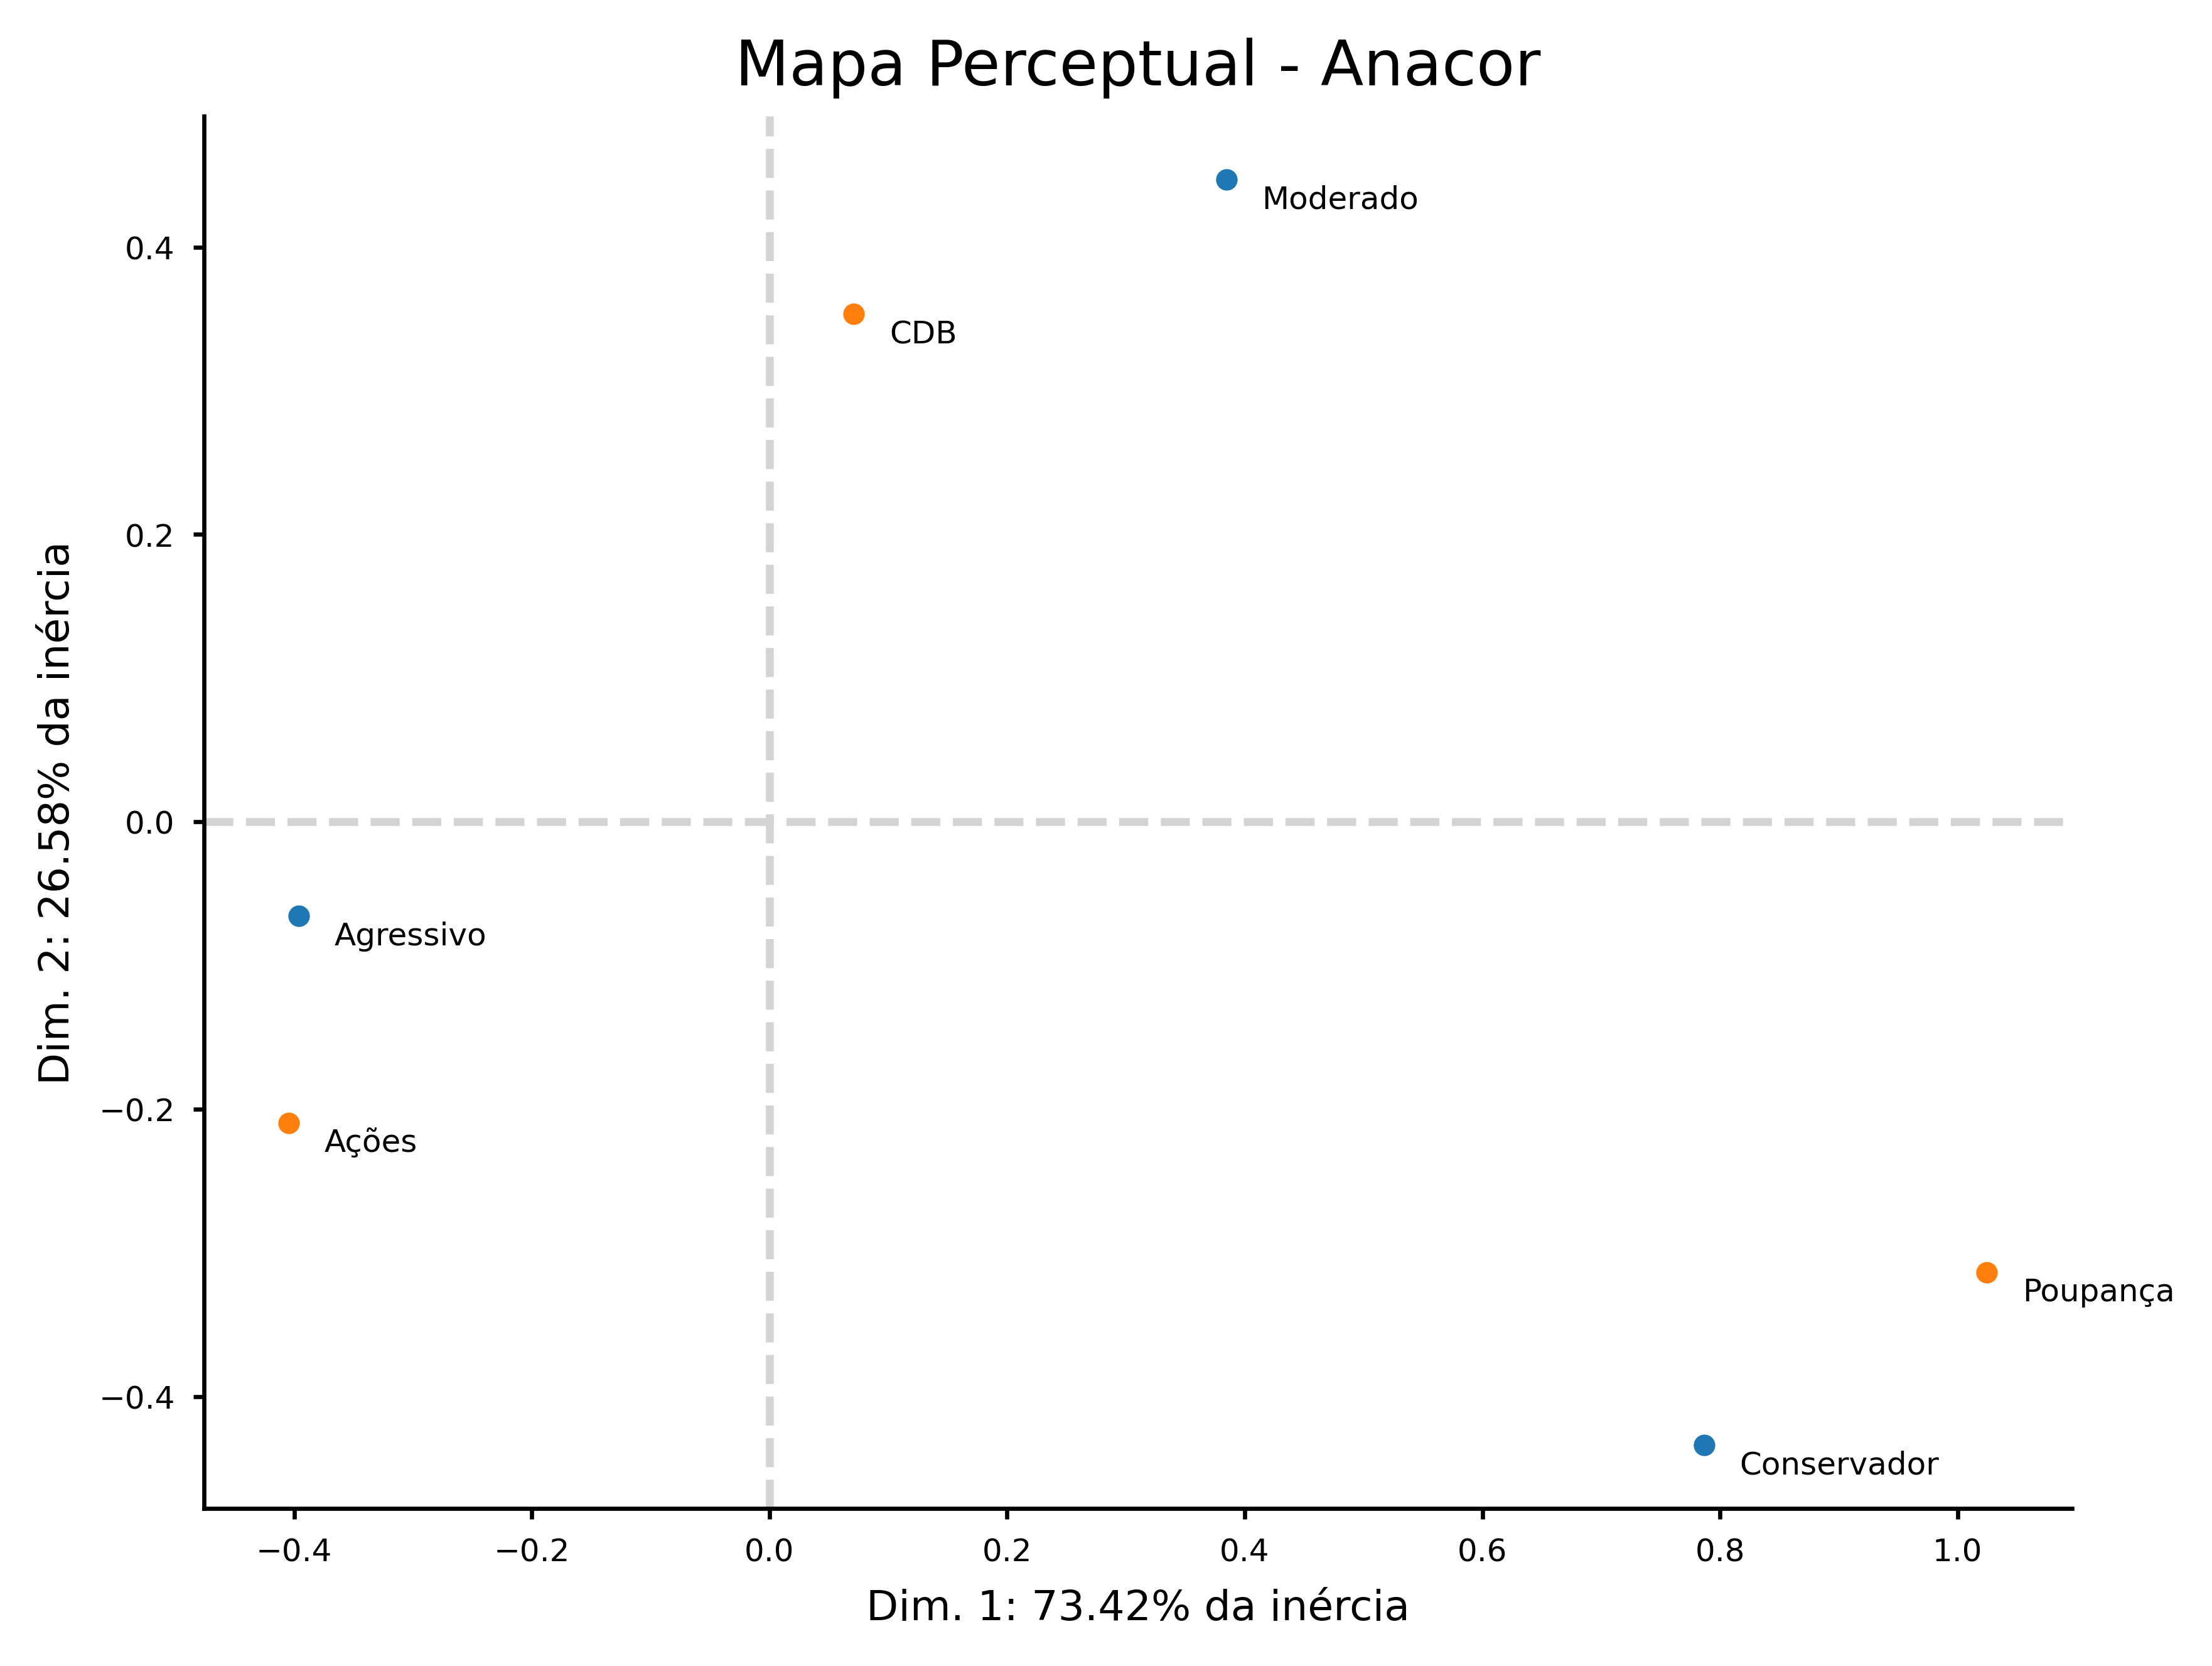

In [41]:
#%% Plotando o mapa percentual da Anacor

chart_df_row = pd.DataFrame({'var_row': tabela.index,
                             'x_row': ca.row_coordinates(tabela)[0].values,
                             'y_row': ca.row_coordinates(tabela)[1].values})

chart_df_col = pd.DataFrame({'var_col': tabela.columns,
                             'x_col': ca.column_coordinates(tabela)[0].values,
                             'y_col': ca.column_coordinates(tabela)[1].values})

plt.figure(dpi=600)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=6)

label_point(x = chart_df_col['x_col'],
            y = chart_df_col['y_col'],
            val = chart_df_col['var_col'],
            ax = plt.gca())

label_point(x = chart_df_row['x_row'],
            y = chart_df_row['y_row'],
            val = chart_df_row['var_row'],
            ax = plt.gca())

sns.scatterplot(data=chart_df_row, x='x_row', y='y_row', s=20)
sns.scatterplot(data=chart_df_col, x='x_col', y='y_col', s=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--')
plt.axvline(x=0, color='lightgrey', ls='--')
plt.tick_params(size=2, labelsize=6)
plt.title("Mapa Perceptual - Anacor", fontsize=12)
plt.xlabel(f"Dim. 1: {tabela_autovalores.iloc[0,1]} da inércia", fontsize=8)
plt.ylabel(f"Dim. 2: {tabela_autovalores.iloc[1,1]} da inércia", fontsize=8)
plt.show()


In [42]:
#%% Obtendo as coordenadas das observações

# Identificando as variáveis em linha e em coluna
coord_obs = perfil.rename(columns={'Perfil':'var_row',
                                   'Tipo de Aplicação':'var_col'})

# Unindo as coordenadas das categorias ao DataFrame
coord_obs = pd.merge(coord_obs, chart_df_row, how='left', on='var_row')
coord_obs = pd.merge(coord_obs, chart_df_col, how='left', on='var_col')

# Calculando as coordenadas médias das observações (média de suas categorias)
coord_obs['x_obs'] = coord_obs[['x_row','x_col']].mean(axis=1)
coord_obs['y_obs'] = coord_obs[['y_row','y_col']].mean(axis=1)

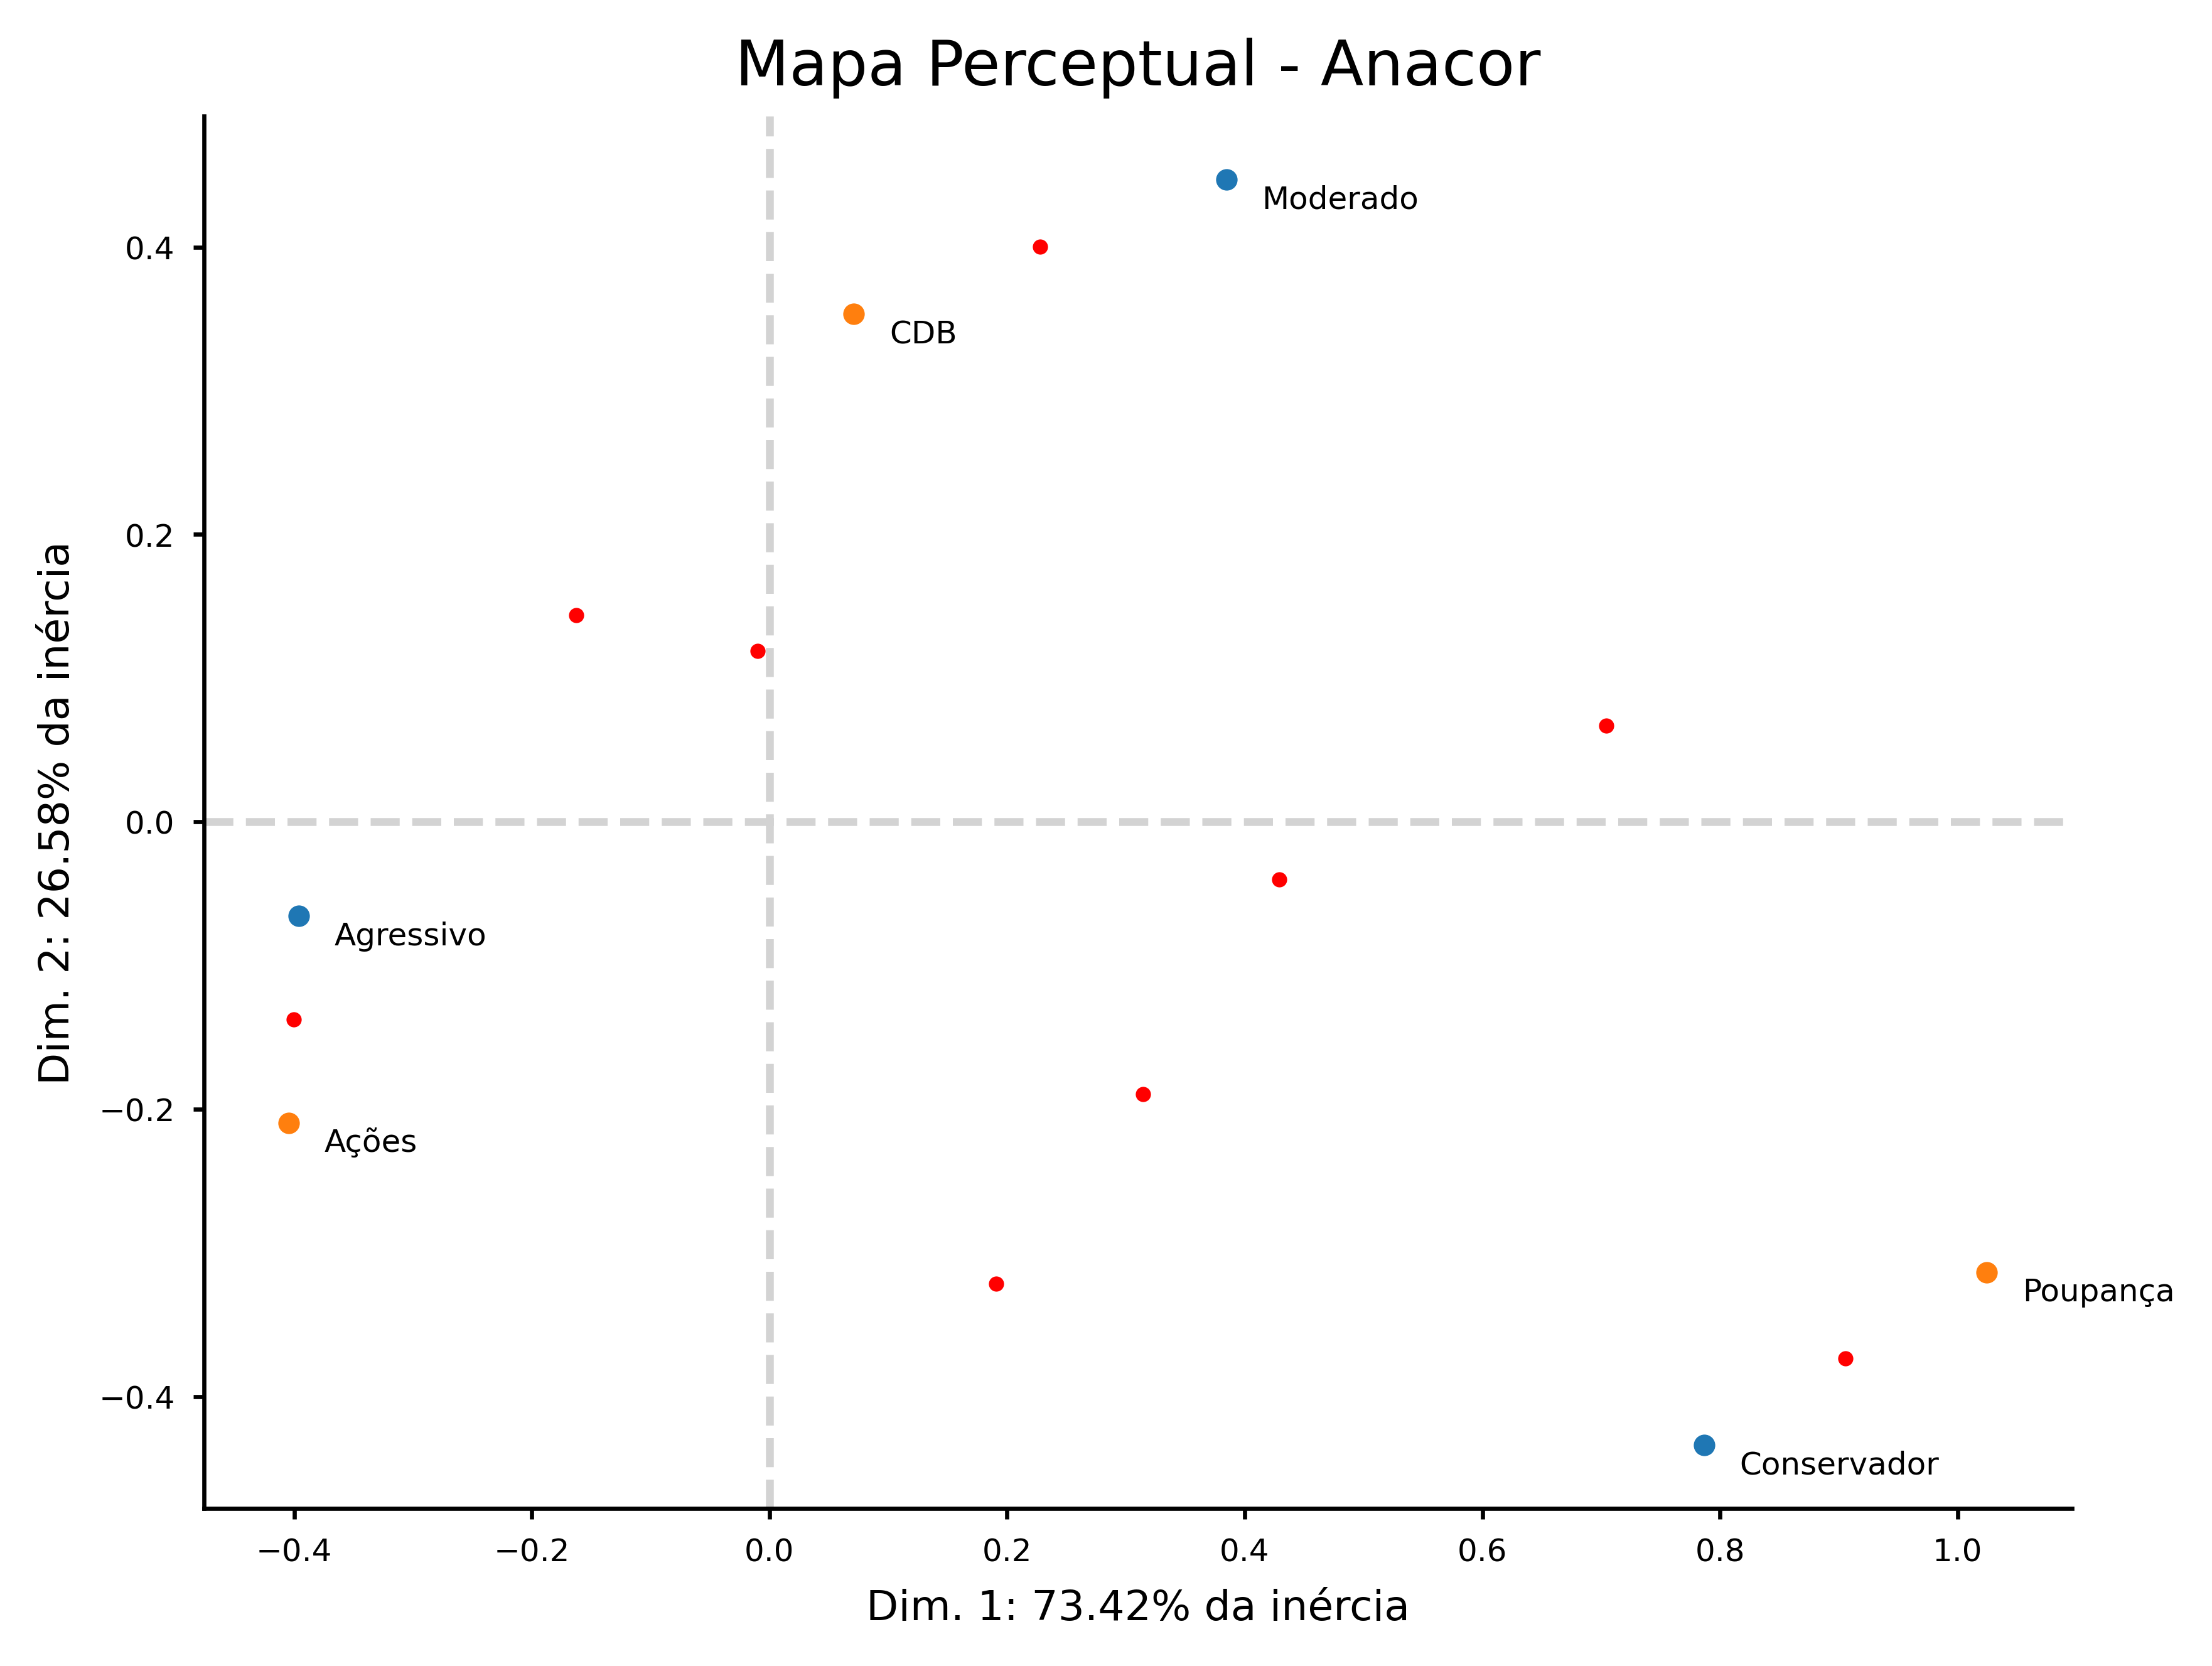

In [43]:
#%% Plotando o mapa percentual da Anacor

chart_df_row = pd.DataFrame({'var_row': tabela.index,
                             'x_row': ca.row_coordinates(tabela)[0].values,
                             'y_row': ca.row_coordinates(tabela)[1].values})

chart_df_col = pd.DataFrame({'var_col': tabela.columns,
                             'x_col': ca.column_coordinates(tabela)[0].values,
                             'y_col': ca.column_coordinates(tabela)[1].values})

plt.figure(dpi=600)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=6)

label_point(x = chart_df_col['x_col'],
            y = chart_df_col['y_col'],
            val = chart_df_col['var_col'],
            ax = plt.gca())

label_point(x = chart_df_row['x_row'],
            y = chart_df_row['y_row'],
            val = chart_df_row['var_row'],
            ax = plt.gca()) 

sns.scatterplot(data=chart_df_row, x='x_row', y='y_row', s=20)
sns.scatterplot(data=chart_df_col, x='x_col', y='y_col', s=20)
sns.scatterplot(data=coord_obs, x='x_obs', y='y_obs', s=10, color='red')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--')
plt.axvline(x=0, color='lightgrey', ls='--')
plt.tick_params(size=2, labelsize=6)
plt.title("Mapa Perceptual - Anacor", fontsize=12)
plt.xlabel(f"Dim. 1: {tabela_autovalores.iloc[0,1]} da inércia", fontsize=8)
plt.ylabel(f"Dim. 2: {tabela_autovalores.iloc[1,1]} da inércia", fontsize=8)
plt.show()

#%% FIM!